In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ЗАГРУЗКА НЕОБХОДИМЫХ БИБЛИОТЕК И ДАННЫХ
===

In [2]:
bmv = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\bmw.csv')
audi = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\audi.csv')
skoda = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\skoda.csv')
ford = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\ford.csv')
merc = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\merc.csv')
hyundi = pd.read_csv('C:\\Users\\1\\OneDrive\\Рабочий стол\\aset\\Datasets\\hyundi.csv')

ПЕРВИЧНЫЙ АНАЛИЗ
==
model         - МОДЕЛЬ

year          - ГОД 

price         - ЦЕНА       ____                 (ЦЕЛЕВАЯ ФИЧА)

transmission  - КОРОБКА ПЕРЕДАЧ

mileage       - ПРОБЕГ 

fuelType      - ТИП ТОПЛИВА 

tax           - НАЛОГ 

mpg           - МИЛЬ НА ГАЛЛОН

engineSize    - РАЗМЕР ДВИГАТЕЛЯ 

car_type      - ТИП АВТОМОБИЛЯ 

In [3]:
print(bmv.shape,
skoda.shape,
audi.shape,
ford.shape,
merc.shape,
hyundi.shape)

(10781, 9) (6267, 9) (10668, 9) (17965, 9) (13119, 9) (4860, 9)


In [4]:
hyundi = hyundi.rename(columns={"tax(£)": "tax"}) #ПРИВОДИМ К ОБЩЕМУ ВИДУ ТАХ

In [5]:
bmv['car_type'] = 'bmv'
audi['car_type'] = 'audi'
skoda['car_type'] = 'skoda'
ford['car_type'] = 'ford'
merc['car_type'] = 'merc'
hyundi['car_type'] = 'hyundi'

In [6]:
bmv['model'].unique()  #КАКИЕ МАРКИ БМВ ЕСТЬ В НАШЕМ ДАТАСЕТЕ

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [7]:
data = pd.concat([bmv,skoda,audi,ford,merc,hyundi], sort = False, axis = 0)    ###КОНКАТЕНАЦИЯ ВСЕХ ТАБЛИ В ОДНУ

In [8]:
data.shape

(63660, 10)

In [9]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'car_type'],
      dtype='object')

In [10]:
data.info()    #ВИДИМ ЧТО ДАННЫЕ В ПОРЯДКЕ, ПРОПУСКОВ НЕТУ, ПРОБЛЕМА ТОЛЬКО В ТИПЕ ДАННЫХ, НЕОБХОДИМО ВСЕ ДАННЫЕ ПРЕОБРАЗОВАТЬ В ЧИСЛА,УДАЛИТЬ НЕНУЖНЫЕ КОЛОНКИ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63660 entries, 0 to 4859
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         63660 non-null  object 
 1   year          63660 non-null  int64  
 2   price         63660 non-null  int64  
 3   transmission  63660 non-null  object 
 4   mileage       63660 non-null  int64  
 5   fuelType      63660 non-null  object 
 6   tax           63660 non-null  int64  
 7   mpg           63660 non-null  float64
 8   engineSize    63660 non-null  float64
 9   car_type      63660 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.3+ MB


In [11]:
data.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
car_type        False
dtype: bool

In [12]:
data.describe()   #ОПИСЫВАЕМ СТАТИСТИЧЕСКИЕ ДАННЫЕ

,year,price,mileage,tax,mpg,engineSize
count,63660.000000,63660.000000,63660.000000,63660.000000,63660.000000,63660.000000
mean,2017.111310,18620.912850,23215.967295,122.995523,55.447512,1.751191
std,2.131846,10787.684561,21563.895938,62.846025,17.423536,0.614883
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,11108.000000,7120.750000,125.000000,47.100000,1.300000
50%,2017.000000,16300.000000,17299.000000,145.000000,55.400000,1.700000
75%,2019.000000,22998.000000,32711.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [13]:
data.duplicated().sum() #ЕСТЬ 798 ДУБЛИРОВАННЫХ ДАННЫХ

798

In [14]:
data = data.drop_duplicates().reset_index()  #ДРОПАЕМ ЭТИ ТУБЛИКАТЫ 
data

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmv
1,1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmv
2,2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmv
3,3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmv
4,4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmv
...,...,...,...,...,...,...,...,...,...,...,...
62857,4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,hyundi
62858,4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi
62859,4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi
62860,4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi


In [15]:
drop=data[(data['year']>2022)].index.values ###УДАЛЯЕМ ВЫБРОСЫ В КОЛОНКЕ ГОД (2060 И 1970)
drop1=data[(data['year']<1997)].index.values 
data.drop(drop, axis=0, inplace=True)
data.drop(drop1, axis=0, inplace=True)

In [16]:
data.drop('index',axis=1,inplace=True )          ### УДАЛЯЕМ КОЛОНКУ ИНДЕКСА

In [17]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,62858.000000,62858.000000,62858.000000,62858.000000,62858.000000,62858.000000
mean,2017.097410,18580.402240,23338.363915,122.912119,55.486971,1.752440
std,2.114139,10783.530404,21507.834828,62.970928,17.461228,0.615865
min,1997.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,11070.500000,7301.000000,125.000000,47.100000,1.300000
50%,2017.000000,16270.000000,17456.000000,145.000000,55.400000,1.700000
75%,2019.000000,22991.000000,32862.500000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [18]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmv
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmv
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmv
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmv
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmv
...,...,...,...,...,...,...,...,...,...,...
62857,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,hyundi
62858,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi
62859,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi
62860,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi


In [18]:
data_transmission = data[['transmission','fuelType']].value_counts()
data_transmission

transmission  fuelType
Manual        Petrol      19348
              Diesel      11469
Semi-Auto     Diesel      10579
Automatic     Diesel       8856
Semi-Auto     Petrol       7057
Automatic     Petrol       4612
              Hybrid        605
Semi-Auto     Hybrid        247
Automatic     Other          50
Manual        Hybrid         22
Automatic     Electric        5
Manual        Other           3
Other         Petrol          2
              Diesel          1
              Hybrid          1
              Other           1
dtype: int64

In [21]:
data_tran = data.groupby(['transmission','fuelType']).count()
data_tran

model   year  price  mileage    tax    mpg  engineSize  \
transmission fuelType                                                           
Automatic    Diesel     8856   8856   8856     8856   8856   8856        8856   
             Electric      5      5      5        5      5      5           5   
             Hybrid      605    605    605      605    605    605         605   
             Other        50     50     50       50     50     50          50   
             Petrol     4612   4612   4612     4612   4612   4612        4612   
Manual       Diesel    11469  11469  11469    11469  11469  11469       11469   
             Hybrid       22     22     22       22     22     22          22   
             Other         3      3      3        3      3      3           3   
             Petrol    19348  19348  19348    19348  19348  19348       19348   
Other        Diesel        1      1      1        1      1      1           1   
             Hybrid        1      1      1        1      1      1           1   
             Other         1      1      1        1      1      1           1   
             Petrol        2      2      2        2      2      2           2   
Semi-Auto    Diesel    10579  10579  10579    10579  10579  10579       10579   
             Hybrid      247    247    247      247    247    247         247   
             Petrol     7057   7057   7057     7057   7057   7057        7057   

                       car_type  
transmission fuelType            
Automatic    Diesel        8856  
             Electric         5  
             Hybrid         605  
             Other           50  
             Petrol        4612  
Manual       Diesel       11469  
             Hybrid          22  
             Other            3  
             Petrol       19348  
Other        Diesel           1  
             Hybrid           1  
             Other            1  
             Petrol           2  
Semi-Auto    Diesel       10579  
             Hybrid         247  
             Petrol        7057

In [19]:
print(f'TOTAL=',data.groupby(['year'])['model'].count().sum())
data_year_model = data.groupby(['year'])['model'].count()
data_year_model

TOTAL= 62858


year
1997        3
1998        7
1999        5
2000        7
2001       13
2002       21
2003       21
2004       35
2005       41
2006       48
2007       96
2008      126
2009      179
2010      213
2011      263
2012      415
2013     1753
2014     2590
2015     4864
2016     9633
2017    13567
2018     8992
2019    17260
2020     2706
Name: model, dtype: int64

In [20]:
data['model'].count()

62858

In [21]:
data.corr(method = 'spearman') #корреляции в ранговой шкале

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.619143,-0.822035,0.303519,-0.304269,-0.039277
price,0.619143,1.000000,-0.545988,0.344063,-0.472880,0.585316
mileage,-0.822035,-0.545988,1.000000,-0.246570,0.332546,0.092647
tax,0.303519,0.344063,-0.246570,1.000000,-0.544811,0.193121
mpg,-0.304269,-0.472880,0.332546,-0.544811,1.000000,-0.271953
engineSize,-0.039277,0.585316,0.092647,0.193121,-0.271953,1.000000


In [22]:
data.corr(method = 'kendall')

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.471533,-0.663394,0.243501,-0.223173,-0.031314
price,0.471533,1.000000,-0.379306,0.258692,-0.332810,0.432416
mileage,-0.663394,-0.379306,1.000000,-0.180868,0.227641,0.066877
tax,0.243501,0.258692,-0.180868,1.000000,-0.435502,0.154227
mpg,-0.223173,-0.332810,0.227641,-0.435502,1.000000,-0.205375
engineSize,-0.031314,0.432416,0.066877,0.154227,-0.205375,1.000000


In [23]:
data.corr(method = 'pearson') #следует использовать когда наши данные имеют вид нормального распределения, на данном этапе данные распределены не нормально 

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.505616,-0.749423,0.160105,-0.112020,-0.046479
price,0.505616,1.000000,-0.438304,0.316379,-0.323379,0.631879
mileage,-0.749423,-0.438304,1.000000,-0.201682,0.167287,0.096872
tax,0.160105,0.316379,-0.201682,1.000000,-0.417531,0.315420
mpg,-0.112020,-0.323379,0.167287,-0.417531,1.000000,-0.291640
engineSize,-0.046479,0.631879,0.096872,0.315420,-0.291640,1.000000


ВИЗУАЛИЗАЦИЯ ДАННЫХ
===

<AxesSubplot:>

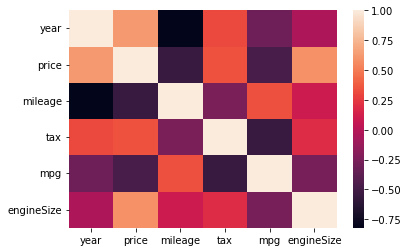

In [24]:
sns.heatmap(data.corr(method = 'spearman'))

<AxesSubplot:xlabel='car_type', ylabel='count'>

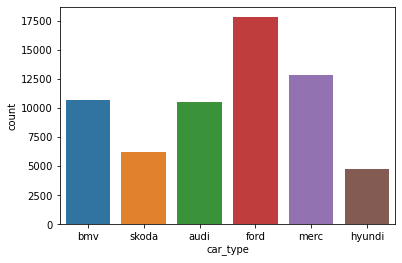

In [25]:
sns.countplot(data=data, x='car_type')

<AxesSubplot:ylabel='year'>

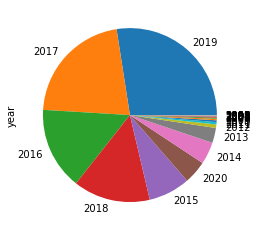

In [30]:
data['year'].value_counts( normalize=True).plot.pie()

In [31]:
print(f'TOTAL=', data['year'].value_counts( normalize=False).sum())
print('-'*20)
print(f'normalize=False :', data['year'].value_counts( normalize=False),f'normalize=True :', data['year'].value_counts( normalize=True))


TOTAL= 62858
--------------------
normalize=False : 2019    17260
2017    13567
2016     9633
2018     8992
2015     4864
2020     2706
2014     2590
2013     1753
2012      415
2011      263
2010      213
2009      179
2008      126
2007       96
2006       48
2005       41
2004       35
2002       21
2003       21
2001       13
2000        7
1998        7
1999        5
1997        3
Name: year, dtype: int64 normalize=True : 2019    0.274587
2017    0.215836
2016    0.153250
2018    0.143053
2015    0.077381
2020    0.043049
2014    0.041204
2013    0.027888
2012    0.006602
2011    0.004184
2010    0.003389
2009    0.002848
2008    0.002005
2007    0.001527
2006    0.000764
2005    0.000652
2004    0.000557
2002    0.000334
2003    0.000334
2001    0.000207
2000    0.000111
1998    0.000111
1999    0.000080
1997    0.000048
Name: year, dtype: float64


<AxesSubplot:xlabel='fuelType', ylabel='count'>

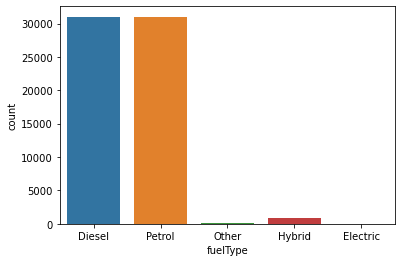

In [32]:
sns.countplot(x="fuelType",data=data)

<AxesSubplot:xlabel='transmission', ylabel='count'>

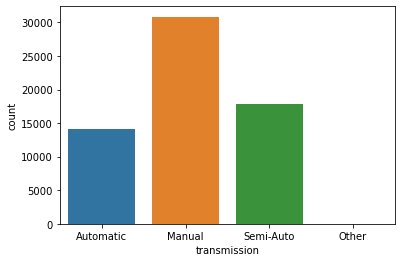

In [33]:
sns.countplot(data=data, x='transmission')

<AxesSubplot:xlabel='year', ylabel='price'>

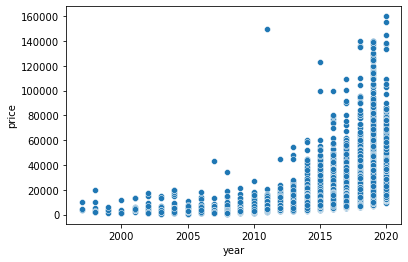

In [34]:
sns.scatterplot(data=data, x='year',y='price')

<AxesSubplot:ylabel='Frequency'>

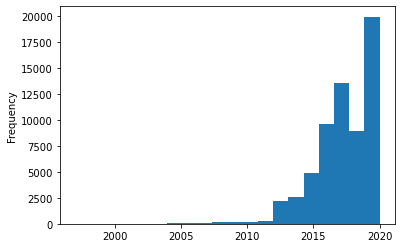

In [35]:
data['year'].plot.hist(label='year',bins=20, alpha=1)

In [36]:
data #ЕЩЕ РАЗ ПОСМОТРИМ НА ДАННЫЕ 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmv
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmv
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmv
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmv
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmv
...,...,...,...,...,...,...,...,...,...,...
62857,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,hyundi
62858,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi
62859,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi
62860,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi


ПРЕОБРАЗОВАНИЕ КАТЕГОРИАЛЬНЫХ ДАННЫХ
===

In [37]:
le = LabelEncoder()
le.fit(data['car_type'])
data['car_type_labEnc'] = le.transform(data['car_type'])
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type,car_type_labEnc
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmv,1
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmv,1
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmv,1
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmv,1
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmv,1
...,...,...,...,...,...,...,...,...,...,...,...
62857,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,hyundi,3
62858,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,hyundi,3
62859,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,hyundi,3
62860,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,hyundi,3


In [38]:
car_nums2 = {"car_type":{"bmv": 0, "skoda": 1,"audi": 2,"ford": 3,"merc": 4,"hyundi": 5}}

In [65]:
data = data.replace(car_nums2)
data

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,...,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,car_type_0,car_type_1,car_type_2,car_type_3,car_type_4,car_type_5
0,2014,11200,67068,125,57.6,2.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2016,16000,62794,160,51.4,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62857,2016,8680,25906,0,78.4,1.6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
62858,2015,7830,59508,30,65.7,1.7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
62859,2017,6830,13810,20,60.1,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
62860,2018,13994,23313,145,44.8,1.6,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
data = pd.get_dummies(data, columns=["transmission", "fuelType","car_type"])

In [22]:
data

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,car_type_audi,car_type_bmv,car_type_ford,car_type_hyundi,car_type_merc,car_type_skoda
0,5 Series,2014,11200,67068,125,57.6,2.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6 Series,2018,27000,14827,145,42.8,2.0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,5 Series,2016,16000,62794,160,51.4,3.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1 Series,2017,12750,26676,145,72.4,1.5,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7 Series,2014,14500,39554,160,50.4,3.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62857,I30,2016,8680,25906,0,78.4,1.6,0,1,0,...,0,0,0,0,0,0,0,1,0,0
62858,I40,2015,7830,59508,30,65.7,1.7,0,1,0,...,0,0,0,0,0,0,0,1,0,0
62859,I10,2017,6830,13810,20,60.1,1.0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
62860,Tucson,2018,13994,23313,145,44.8,1.6,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [23]:
data_x = data.drop(['price', 'model'],axis= 1)
data_y = data['price']

In [24]:
data_x

,year,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,car_type_audi,car_type_bmv,car_type_ford,car_type_hyundi,car_type_merc,car_type_skoda
0,2014,67068,125,57.6,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2018,14827,145,42.8,2.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2016,62794,160,51.4,3.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2017,26676,145,72.4,1.5,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,2014,39554,160,50.4,3.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62857,2016,25906,0,78.4,1.6,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
62858,2015,59508,30,65.7,1.7,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
62859,2017,13810,20,60.1,1.0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
62860,2018,23313,145,44.8,1.6,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [25]:
data_y

0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
62857     8680
62858     7830
62859     6830
62860    13994
62861    15999
Name: price, Length: 62858, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.8, random_state = 10)

In [27]:
err =[]
model = LinearRegression()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
err.append(pd.Series({'train': mean_squared_error(y_train, y_pred_train),
                           'test' : mean_squared_error(y_test,  y_pred_test),
                              'r2_test' : r2_score(y_pred_test, y_test),
                            'r2_train' : r2_score(y_pred_train, y_train)}, 
                           name='Linear Regression'))
err

[train       2.818505e+07
 test        2.830226e+07
 r2_test     6.799125e-01
 r2_train    6.808050e-01
 Name: Linear Regression, dtype: float64]

In [30]:
model1 = Lasso(alpha=0.1)

In [31]:
err1 = []
model1.fit(x_train,y_train)
y_pred_test = model1.predict(x_test)
y_pred_train = model1.predict(x_train)
err1.append(pd.Series({'train': mean_squared_error(y_train, y_pred_train),
                           'test' : mean_squared_error(y_test,  y_pred_test),
                              'r2_test' : r2_score(y_pred_test, y_test),
                            'r2_train' : r2_score(y_pred_train, y_train)}, 
                           name='lasso'))
err1

[train       2.818521e+07
 test        2.830039e+07
 r2_test     6.798822e-01
 r2_train    6.807569e-01
 Name: lasso, dtype: float64]

In [35]:
model2 = Ridge()

In [37]:
err2 = []
model2.fit(x_train,y_train)
y_pred_test = model2.predict(x_test)
y_pred_train = model2.predict(x_train)
err2.append(pd.Series({'train': mean_squared_error(y_train, y_pred_train),
                           'test' : mean_squared_error(y_test,  y_pred_test),
                              'r2_test' : r2_score(y_pred_test, y_test),
                            'r2_train' : r2_score(y_pred_train, y_train)}, 
                           name='Ridge'))
err2

[train       2.818571e+07
 test        2.830054e+07
 r2_test     6.798634e-01
 r2_train    6.807385e-01
 Name: Ridge, dtype: float64]

In [43]:
x_const = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_const)
ans = model1.fit()
pd.DataFrame({'coef':ans.params, 'p-values': round(ans.pvalues,3)})

,coef,p-values
const,-2.216943e+06,0.0
year,1.784551e+03,0.0
mileage,-1.006568e-01,0.0
tax,-6.667013e+00,0.0
mpg,-6.165052e+01,0.0
engineSize,9.743635e+03,0.0
transmission_Automatic,-5.535959e+05,0.0
transmission_Manual,-5.555113e+05,0.0
transmission_Other,-5.544572e+05,0.0
transmission_Semi-Auto,-5.533784e+05,0.0


In [26]:
models = RandomForestClassifier()
models.fit(x_train, y_train)
y_pred = models.predict(x_test)
acc = accuracy_score(y_pred, y_test)
acc

0.02577319587628866

In [ ]:
params = {
    'learning_rate': [0.2, 0.4, 0.6],
    'n_estimators': [50, 150],
    'subsample':[0.5, 0.3, 0.8]
}

In [ ]:
r_search = RandomizedSearchCV(GradientBoostingClassifier(), params)
r_search.fit(x_train, y_train)
r_search.best_estimator_

NameError: name 'ast' is not defined

In [45]:
max_price = data[(data['year']== data['year'].max())] #Самая дорогая и дешевая машина
min_price = data[(data['year']== data['year'].min())]
max_min_price = pd.concat([max_price,min_price], sort = False, axis = 0)
max_min_price

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
44989,17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,ford
57043,12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0,merc


Easy
Взять один файл с маркой машины.

Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском SGDRegressor). Оценить качество, используя метрику r2_score. Оценить важность признаков (параметр feature_importance_ у случайного леса).

###Проверка гипотез==

In [48]:
import scipy

In [ ]:
stat, p = scipy.stats.shapiro(df) ###ДЛЯ ПРОВЕРКИ НАШЕ РАСПРЕДЕЛЕНИЕ НА НОРМАЛЬНОСТЬ!!! ЕСЛИ  Р>0.05 ТО ПРИНИМАЕТ ГИПОТЕЗУ
                                                                                    #         Р<0.05 ТО ОТКЛОНЯЕМ ГИПОТЕЗУ 